# 性能度量

对于某些聚类结果，需要通过性能度量来评估其好坏，同时，也可以作为优化目标。

什么样才是好的性能度量方法：

1. 簇内相似度——高
2. 簇间相似度——低

  聚类性能度量大致有2类，一类是将聚类结果与某个“参考模型”（reference model）进行比较，称之为“外部指标”（external index），另一类是直接考察聚类结果而不利用任何参考模型，称之为“内部指标”（internal index）

数据集$D=\{\pmb{x}_1,\pmb{x}_2,...,\pmb{x}_m\}$，假定通过聚类给出的簇划分为$C=\{C_1,C_2,...,C_K\}$,参考模型给出的簇划分为$C^*=\{C_1^*, C_2^*, ..., C_s^*\}$。相应的，令$\lambda$与$\lambda^*$分别表示与$C$与$C^*$对应的簇标记向量，我们将样本两两 
$$
a=|SS|, SS=\{(x_i,y_i)|\lambda_i=\lambda_j, \lambda_i^*=\lambda_j^*, i < j \} \\
b=|SD|, SS=\{(x_i,y_i)|\lambda_i=\lambda_j, \lambda_i^*\neq\lambda_j^*, i < j \} \\
c=|DS|, SS=\{(x_i,y_i)|\lambda_i\neq\lambda_j, \lambda_i^*=\lambda_j^*, i < j \} \\
d=|SS|, SS=\{(x_i,y_i)|\lambda_i\neq\lambda_j, \lambda_i^*\neq\lambda_j^*, i < j \}
$$
于是，$a+b+c+d=\frac{m(m-1)}{2}$

## 外部指标

1）Jaccard系数
$$
JC=\frac{a}{a+b+c}
$$
2）FM指数
$$
FMI=\sqrt{\frac{a}{a+b} \cdot \frac{a}{a+c}}
$$
3）Rand指数
$$
RI=\frac{2(a+d)}{m(m-1)}
$$
以上指标值域$[0,1]$，越大越好。

## 内部指标

考虑聚类结果的簇划分，定义
$$
avg(C) = \frac{2}{|C|(|C|-1)}\sum_{1\leqslant i \leqslant j \leqslant |C|}dist(\pmb{x}_i, \pmb{x}_j)\\
diam(C)=max_{1\leqslant i \leqslant j \leqslant |C|}dist(\pmb{x}_i, \pmb{x}_j)\\
d_{min}(C_i,C_j)=min_{\pmb{x}_i \in C_i,\pmb{x}_j \in C_j} dist(\pmb{x}_i, \pmb{x}_j)\\
d_{cen}(C_i,C_j)=dist(\pmb{\mu}_i, \pmb{\mu}_j)
$$
其中，$dist(\cdot , \cdot)$言语计算2个样本之间的距离；$\mu$代表簇$C$的中心点$\mu=\frac{1}{|C|}\sum_{1 \leqslant i \leqslant |C|}\pmb{x}_i$。显然，$avg(C)$簇$C$内样本的平均距离，$diam(C)$代表簇内最远距离，$d_{min}$代表簇内最近距离。$d_{cen}(C_i,C_j)$代表簇$C_i$与$C_j$中心点距离。

1）DB指数（Davies-Bouldin Index）
$$
DBI=\frac{1}{k}\sum_{i=1}^{k} \underset{j \neq i}{max}(\frac{avg(C_i) + avg(C_j)}{d_{cen}(C_i,C_j)})
$$
2）Dunn指数（Dunn Index）
$$
DI=\underset{1 \leqslant i \leqslant j}{min}\{\underset{j \neq i}{min}(\frac{d_{min}(C_i,C_j)}{\underset{1 \leqslant l \leqslant k}{max}diam(C_l))}) \}
$$
显然，$DBI$越小越好，而$DI$越大越好。




## 距离计算

对函数$dist(\cdot,\cdot)$，若它是一个“距离度量”，就应该满足一下性质

1. 非负性：$dist(\pmb{x}_i, \pmb{x}_j)$
2. 同一性：$dist(\pmb{x}_i,\pmb{x}_j)=0$，当且仅当$\pmb{x}_i = \pmb{x}_j$
3. 对称性：$dist(\pmb{x}_i,\pmb{x}_j)= dist(\pmb{x}_j,\pmb{x}_i)$
4. 直递性：$dist(\pmb{x}_i,\pmb{x}_j) \leqslant dist(\pmb{x}_i,\pmb{x}_k) + dist(\pmb{x}_k,\pmb{x}_j)$

### 闵可夫斯基距离

给定样本$\pmb{x}_i = (x_{i1},x_{i2},...,x_{in})$与样本$\pmb{x}_j = (x_{j1},x_{j2},...,x_{jn})$最常用的是“闵可夫斯基距离”（Minkowski distance）。
$$
dist_{ed}(\pmb{x}_i,\pmb{x}_j) = (\sum_{u=1}^{n}|x_{iu} - x_{ju}|^p)^{\frac{1}{p}}
$$
当$p \geqslant 1$时，满足以上性质。

$p=2$时，就是欧式距离，$p=1$时就是曼哈顿距离。

显然，属性分为连续与离散属性，还包括有序与无序，如$\{1,2,3\}$，显然，可以计算出来1-2,比1-3更近，还包括$\{飞机，火车，轮船\}$，无序属性，显然，闵可夫斯基距离适用于有序属性。




### VDM距离

VDM（Value Difference Metric）距离，令$m_{u,a}$表示属性$u$上取值为$a$的样本数，$m_{u,a,i}$表示在第$i$个样本簇中在属性$u$上取值为$a$的样本数则属性$u$上2个离散值$a,b$之间的$VDM$距离为
$$
VDM_{p}(a,b) = \sum_{i=1}^{k}|\frac{m_{u,a,i}}{m_{u,a}} - \frac{m_{u,b,i}}{m_{u,b}}|^p
$$


## 混合属性处理

将闵可夫斯基距离与VDM结合即可以处理混合属性。

假定有$n_c$个有序属性，$n-n_c$个无序属性，不失一般性，将有序属性排列在无序属性前，则：
$$
MinkovDm_{p}(\pmb{x}_i,\pmb{x}_j) = (\sum_{u=1}^{n_c}|x_{iu} - x_{ju}|^p + \sum_{u=n_c+1}^{n}VDM_{p}(x_{iu,x_{ju}}))^\frac{1}{p}
$$
甚至，当样本空间中不同属性的重要性不同时，还可以使用“加权距离”（weighted distance）


## 特例

通常情况下，距离越大，相似度越小。然而，用于相似度度量的某些任务中，但是有些距离度量方法不一定满足所有性质，尤其是直递性。

如人与人马距离近，但是人与马距离得远，不满足直递性。

有时候需要根据实际问题定义距离函数。

# 原型聚类

此算法假设聚类结构可以通过一组原型刻画，在现实聚类任务中极为常见。通常情况下，先对原型进行初始化，然后对原型进行迭代更新求解。采用不同的原型表示，不同的求解方式有不同的算法。


## K均值（$k-means$）算法

数据集$D=\{\pmb{x}_1,\pmb{x}_2,...,\pmb{x}_m\}$，“K-means”算法针对聚类所得簇划分$C=\{C_1,C_2,...,C_K\}$最小化平方误差
$$
E=\sum_{i=1}^{k}\sum_{\pmb{x} \in C_k}||\pmb{x} - \pmb{\mu}_i||_2^2
$$
其中$\pmb{\mu}_i$是$C_i=\frac{1}{|C_i|}\sum_{x \in C_i}\pmb{x}$的簇$C_i$的均值向量。上式在一定程度上刻画了簇内样本围绕簇均值向量的紧密程度，$E$越小，则簇内样本相似度越高。

显然，上式是个NP难题，求解$k-means$使用的是贪心算法。

算法步骤简单：

1. 随机K个样本作为初始均值向量

Repeat：

1. 每个样本计算与K个簇距离，将它的簇类别标记为距离最近的簇
2. 更新均值向量，重复以上过程

**缺点**：强行规定了K类，不一定符合实际情况


## 2.2 学习向量量化（LVQ）

利用类别信息

算法：

1. 初始化一组原型向量

Repeat：

1. 样本中随机选取$(\pmb{x}_j,y_j)$,计算与之最近的原型向量$p^*$
2. 此时，如果$y_j$与原型向量同：更新原型向量${p}' = p^* + \eta(\pmb{x}_j-p^*)$
3. 否则：${p}' = p^* - \eta(\pmb{x}_j-p^*)$

停止条件：变化很小或者达到最大迭代次数

此时若二者标记一致，$||{p}'-\pmb{x}_j||_2=(1-\eta)||p^*-\pmb{x}_j||_2$，因为学习率$\eta \in (0,1)$，所以，如果方向同，则新的原型向量更接近于$\pmb{x}_j$,，反之$||{p}'-\pmb{x}_j||_2=(1+\eta)||p^*-\pmb{x}_j||_2$



## 高斯混合聚类

核心是假设数据是由k个高斯分布混合而成，每个数据的概率也由k个高斯分布混合而成。

高维空间高斯分布概率密度函数：
$$
p(\pmb{x})=\frac{1}{(2\pi)^\frac{n}{2}|\sum|^\frac{1}{2}}e^{-\frac{1}{2}(\pmb{x}-\pmb{\mu})^T{\sum}^{-1}(\pmb{x}-\pmb{\mu})}
$$
由此，定义高斯混合分布：
$$
p_{m}=\sum_{i=1}^{k}\alpha_i \cdot p(\pmb{x}|\pmb{\mu}_i,{\sum}_i)\\
s.t. \ \ \ \ \sum_{i=1}^{k}\alpha_i=1,\alpha_i>0
$$
该分布为k个混合成分组成，每个混合成分对应一个高斯分布。

数据集$D=\{\pmb{x}_1,\pmb{x}_2,...,\pmb{x}_m\}$由上述混合高斯过程生成，令随机变量$z_j \in {1,2,...,k}$表示样本$x_j$的高斯混合成分，其取值未知。显然，$z_j$的先验概率$P(z_j=i)$对应于$\alpha_i(1,2,...,k)$。 根据贝叶斯定理，$z_j$的后验概率对应于
$$
{p_{m}(z_j=i|\pmb{x}_j)=\frac{p(z_j=i).p_{m}(x_j|z_j=i)}{p_{m}(\pmb{x}_i)}\\
=\frac{\alpha_i \cdot p(\pmb{x}_j|\pmb{\mu}_j{\sum}_i)}{\sum_{i=1}^{k}\alpha_i \cdot p(\pmb{x}|\pmb{\mu}_i,{\sum}_i)}
}
$$


$p_{m}(z_j=i| \pmb{x}_j)$表示样本$\pmb{x}_j$由第$i$个高斯混合成分生成的后验概率。为了方便表述，由$\gamma_{ji}(i=1,2,...,k)$表示。

则高斯混合聚类将样本划分为k个簇，$C=\{C_1,C_2,...,C_K\}$，每个样本的簇标记就是概率最大的那个：
$$
\lambda_j=\underset{i \in \{1,2,...,l\}}{arg\ max}\ \gamma_{ji}
$$
EM算法求解：求倒数，以及引入柆格郎日因子，得到$\pmb{\mu},\sum,\alpha$表达式




## 密度聚类

基本概念：

1. $\epsilon-$邻域：对于$x_j \in D$,其$\epsilon-$邻域包含原本集D中与$x_j$的距离不大于$\epsilon$的样本
2. 核心对象：$x_j$至少包含MinPts个样本
3. 密度直达：$x_i$是核心对象，$x_j$位于其邻域中，则称$x_j$由$x_i$密度直达
4. 密度可达：对$\pmb{x}_i,\pmb{x}_j$，若存在样本序列$p_1,p_2,...,p_n$，其中，$P_1=\pmb{x}_1,p_n=\pmb{x}_j$且$p_{i+1}$由$p_i$密度直达则称$\pmb{x}_j$由$\pmb{x}_i$密度可达。
5. 密度相连：对$\pmb{x}_i$与$\pmb{x}_j$，若存在$\pmb{x}_k$使得$\pmb{x}_i$与$\pmb{x}_j$均由$\pmb{x}_k$密度可达，则称$\pmb{x}_i,\pmb{x}_j$密度相连。

必须满足2个特点：连接性，最大性。

如果$\pmb{x}$为核心对象，由$\pmb{x}$密度可达的所有样本组成的集合$\pmb{X}$，则$\pmb{X}$为满足连接性，最大性的簇。


## 层次聚类

1. 初始化距离矩阵
2. 不断合并最近的2个簇

得到一个层次结构的聚类，直到满足设定的k个醋



距离方式有多种：平均，最大，最小等

# sklearn实操：k-means

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_classification
from sklearn import neighbors


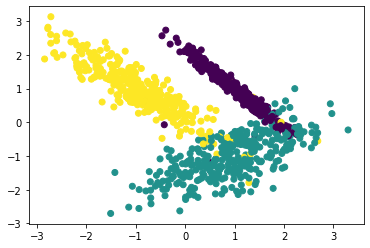

In [8]:
# X为样本特征，Y为样本类别输出， 共1000个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
plt.show()

In [17]:

clf = neighbors.KNeighborsClassifier(n_neighbors = 15 , weights='distance')
clf.fit(X, Y)

KNeighborsClassifier(n_neighbors=15, weights='distance')

Text(0.5, 1.0, "3-Class classification (k = 15, weights = 'distance')")

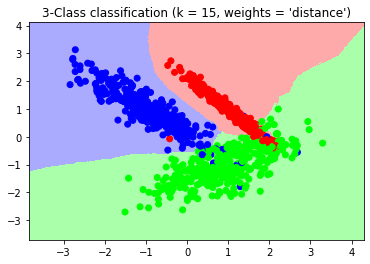

In [19]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 也画出所有的训练集数据
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 15, weights = 'distance')" )

# EM算法

EM算法，也称期望最大算法，存在隐变量时特别适用。

第一步求期望，第二步最大

## EM算法推导

对m个样本$x=(x_1, x_2, ..., x_m)$,根据模型参数（参数的概念，可以参考李航书中关于3枚硬币的例子）$\theta$，极大化模型分布的对数似然函数。
$$
\theta = \underset{\theta}{argmax} \sum_{i=1}^{m}log P(x_i;\theta)
$$
如果有未观察到的变量$z=z_1,z_2,...,z_m$，如LDA模型中单词分布。此时极大化模型分布的对数函数：
$$
\theta = \underset{\theta}{argmax} \sum_{i=1}^{m}log P(x_i;\theta) = \underset{\theta}{argmax} \sum_{i=1}^{m}log\sum_{z_i}P(x_i,z_i;\theta)
$$
因为存在中间变量，无法求出，引入Jensen不等式，假设$z$属于未知新分布$Q_i(z_i)$，其中$Q_i(z_i) \geqslant 0; \sum_{z_i} Q_i(z_i) = 1$,为其概率（连续变量，则为其概率密度函数)，利用Jensen不等式(推导见附录部分):
$$
{\sum_{i=1}^{m}log\sum_{z_i}P(x_i,z_i;\theta) = \sum_{i=1}^{z_i} log\sum_{z_i} Q_i(z_i) \frac{P(x_i,z_i;\theta)}{Q_i(z_i)} \\
\geqslant \sum_{i=1}^{m}\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i;\theta)}{Q_i(z_i)}}\ \ \ \ \ \ \ \ \  \ (1)
$$
满足不等式想等，则需要：
$$
\frac{P(x_i,z_i;\theta)}{Q_i(z_i)} = c,c为常数
$$
因为$\sum_{z_i} Q_i(z_i)=1$，所以，$c = \sum_{z_i}P(x_i,z_i;\theta)$,于是
$$
Q_i(z_i) = \frac{P(x_i,z_i;\theta)}{\sum_{z}P(x_i,z_i;\theta)} = \frac{P(x_i,z_i;\theta)}{P(x_i;\theta)} = P(z_i|x_i;\theta)
$$
此时最大化（1）式是我们最大化似然函数的下界，只要最大化下界，就是最大化目标函数。
$$
\underset{\theta}{argmax} \sum_{i=1}^{m}\sum_{z_i}Q_i(z_i)log\frac{P(x_i,z_i;\theta)}{Q_i(z_i)} \ \ \ \ \ \ \ \ (2)
$$


## 算法步骤

第一步：初始化$\theta$

第二步：重复E-Step，M-Step

1. 根据初始值/上一步计算出来的参数，计算出来$Q_i(z_i) = P(z_i|x_i;\theta)$
   2. 根据上一步，计算式（2），得到新的参数$\theta$;求导数时，省去常数项目c，对先验分布求导数（参考周志华高斯混合聚类）

## Jensen不等式

a)  Jensen不等式普通版本

如果凸函数:
$$
E(f(x)) \geqslant f(E(x))
$$
如果是凹函数：
$$
f(E(x)) \geqslant E(f(x))
$$
当且仅当：$x_1=x_2=...=x_m$时，取等号。

a)  Jensen不等式加权版本：

$$
f(\sum_{i=1}^{n}a_i*x_i) \leqslant \sum_{i=1}^{n}a_if(x_i), \sum_{i=1}^{n}a_i = 1, a_i > 0
$$

c)  与EM相关的一个中间推断

设如下函数
$$
f(x) = log(g(x))
$$
其中，$p_k$为其分布下$g(x_i)$的概率，因为$log x$为凹函数（一元方程，通过二次导数符号判断$-\frac{1}{x^2}$），所以$log\sum p_k \cdot g(x) \geqslant \sum p_k \cdot log(g(x))$ 

其中：$\sum p_k \cdot g(x) = E(g(x))$，而$\sum p_k \cdot log(g(x)) = E(f(x))$

## 注意点
**EM算法对初始点选择比较敏感，可能陷入局部最优**

# sklean：高斯混合聚类

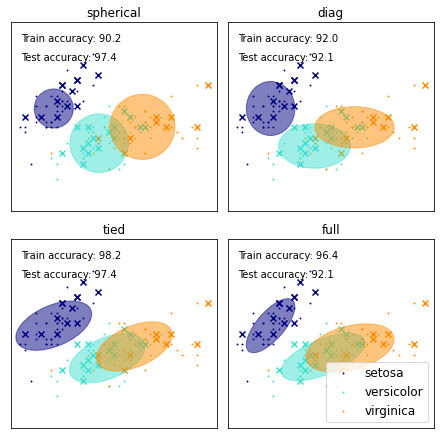

In [1]:
# 来自sklean
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=1)
n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

# 其他聚类对比
其余聚类方法：K-Means,DBSCAN,Hierarchical clustering以及上述聚类优劣也可以见：https://sklearn.apachecn.org/docs/master/22.html